### Crypto Challenge - Correlations

#### Correlations b/w various crypto instruments (Binance)
* Retrieve historic data from Binance using their API
* Historic = most recent 30 days
* Data = daily price data of various perpetual swap instruments
* Instruments = perpetual swaps / on Binance USD-Margined derivatives exchange ("USDS-M"):
    * BTC/USDT
    * ETH/USDT
    * XRP/USDT
    * ADA/USDT
    * SOL/USDT
* Refer below for more instructions

#### Info on USDS-M contracts:
* Settlement in USD-pegged assets: contracts are denominated and settled in USDT or BUSD.
* Expiration: Perpetual and Quarterly.
* Clear pricing rules: each futures contract specifies the base asset's quantity delivered for a single contract, also known as "Contract Unit". For instance, BTC/USDT, ETH/USDT, and BCH/USDT futures contracts represent only one unit of its respective base asset, similar to spot markets.
* (Source: https://www.binance.com/en/support/faq/85eac2bba0b342819122dc9bd4745e9b)

* USDS-M Futures Contract Specifications: (https://www.binance.com/en/support/faq/360033161972)

* Advantages of USDS-M contracts:

* USDⓈ-Margined contracts are linear futures quoted and settled in USDT or BUSD. One of the key benefits of USDT or BUSD settlement is that you can easily calculate your returns in fiat. This makes USDⓈ-Margined contracts more intuitive. For example, when you make 500 BUSD in profit, you can easily estimate that the profit is worth approximately $500 - since the value of 1 BUSD is pegged closely to 1 USD.
Additionally, a universal settlement currency, such as BUSD or USDT, provides more flexibility. You can use the same settlement currency across various futures contracts (i.e., BTC, ETH, XRP, etc.). This eliminates the need to buy the underlying coins to fund futures positions. As such, you will not incur excessive fees as there is no additional conversion required when trading with USDT.
In periods of high volatility, USDⓈ-Margined contracts can help reduce the risk of large price swings. Thus, you do not need to worry about hedging their underlying collateral exposure.

* Price Index of USDS-M Contracts:
* The underlying contract for the Perpetual Contract is the ‘true’ value of the Contract, and an average of the prices on the major markets constitutes the “Price Index” which is the primary component of Mark Price.
The Price Index is a bucket of prices from the major Spot Market Exchanges. The Price Index for USDⓈ-M futures contracts derives prices from Huobi, Okex, Bittrex, HitBTC, Gate.io, Bitmax, Poloniex, FTX, MXC. (Source: https://www.binance.com/en/support/faq/547ba48141474ab3bddc5d7898f97928)

#### Code Documentation
* Binance API docs: (https://binance-docs.github.io/)
* Python-Binance library docs: (https://python-binance.readthedocs.io/)

#### Troubleshooting
* Dev forums: (https://dev.binance.vision)
* 

##### Commenced python-binance SDK library, due to time contraints, continued to interact directly with Binance APIs.

In [440]:
# Install/import dependencies

import json
import requests
# from api_keys import exchange_api_key1, exchange_api_key2
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
from scipy.stats import linregress
import datetime
# python-binance package install


In [441]:
# Import initialise exchange api keys
from api_keys import exchange_api_key1, exchange_api_key2

In [442]:
# Install crypto/finance specific dependencies
# ! pip install python-binance

In [443]:
# Import crypto/finance dependencies
# from binance import Client

In [444]:
# Authenticate exchange API keys to python client (using Binance-Python)
# Setup client
# client = Client(exchange_api_key1, exchange_api_key2)

In [445]:
# tickers = client.get_all_tickers()
# tickers

In [446]:
# Checking rate limits
# client.get_exchange_info()


In [447]:
# price_data = client.get_historical_klines('BTCUSDT', Client.KLINE_INTERVAL_1DAY,'13 Sep 2022')
# price_data

In [448]:
# client.get_historical_klines_generator??

# client.get_continuousklines??

# client.futures_continous_klines('BTCUSDT')
#https://fapi.binance.com/fapi/v1/continuousKlines?pair=BTCUSDT&contractType=PERPETUAL

In [449]:
# base_url = 

In [450]:
# btcfutures = client.get_historical_klines(symbol='BTCUSDT',
#                                           type= 'USD_M_Futures',
#                                           interval=Client.KLINE_INTERVAL_1DAY,
#                                           start_str= '',)

In [451]:
# client.get_continuous_kline()

### Perform API Calls
* Binance API docs:
https://binance-docs.github.io/apidocs/futures/en/#continuous-contract-kline-candlestick-data
* Response:

* 1607444700000,          // Open time
* "18879.99",             // Open
* "18900.00",             // High
* "18878.98",             // Low
* "18896.13",             // Close (or latest price)
* "492.363",              // Volume
* 1607444759999,          // Close time
* "9302145.66080",        // Quote asset volume
* 1874,                   // Number of trades
* "385.983",              // Taker buy volume
* "7292402.33267",        // Taker buy quote asset volume
* "0"                     // Ignore

In [452]:
# Base binance url for calling API
base_url = "https://fapi.binance.com"          # end point for USDS-M
event = "/fapi/v1/continuousKlines"            # Continuous contract Kline
pair_btcusdt = "BTCUSDT"                       # string, mandatory
contractType = 'PERPETUAL'                     # enum, mandatory
interval = '2h'                                # enum, mandatory
limit = 360 + 1                                # 30days x 2hrly + 1 extra for droping due to pct calc NaN

# # Params for additional data
pair_ethusdt = "ETHUSDT"
pair_xrpusdt = "XRPUSDT"
pair_adausdt = "ADAUSDT"
pair_solusdt = "SOLUSDT"


# Build various query URLs
query_url_btcusdt = f"{base_url}{event}?pair={pair_btcusdt}&contractType={contractType}&interval={interval}&limit={limit}"
query_url_ethusdt = f"{base_url}{event}?pair={pair_ethusdt}&contractType={contractType}&interval={interval}&limit={limit}"
query_url_xrpusdt = f"{base_url}{event}?pair={pair_xrpusdt}&contractType={contractType}&interval={interval}&limit={limit}"
query_url_adausdt = f"{base_url}{event}?pair={pair_adausdt}&contractType={contractType}&interval={interval}&limit={limit}"
query_url_solusdt = f"{base_url}{event}?pair={pair_solusdt}&contractType={contractType}&interval={interval}&limit={limit}"

# Timestamp execution (UTC)
executed_utc = str(pd.Timestamp.utcnow())

query_url_ethusdt


'https://fapi.binance.com/fapi/v1/continuousKlines?pair=ETHUSDT&contractType=PERPETUAL&interval=2h&limit=361'

In [453]:
# Loop query_url customising for each pair. 
# This code would be required to scale exercise.

# for pair in pairs:
#     try:
#         # Retrieve "continuousKlines" for perps
#         query_url = f"{base_url}{event}?pair={pair}&contractType={contractType}&interval={interval}"
#         response = requests.get(query_url).json()
#         f'{pair}_raw_df' = pd.DataFrame(response)

In [454]:
response_btcusdt = requests.get(query_url_btcusdt).json()
response_ethusdt = requests.get(query_url_ethusdt).json()
response_xrpusdt = requests.get(query_url_xrpusdt).json()
response_adausdt = requests.get(query_url_adausdt).json()
response_solusdt = requests.get(query_url_solusdt).json()
# response_solusdt

In [455]:
## Convert retrieved json > Pandas dataframe
btcusdt_raw_df = pd.DataFrame(response_btcusdt)
ethusdt_raw_df = pd.DataFrame(response_ethusdt)
xrpusdt_raw_df = pd.DataFrame(response_xrpusdt)
adausdt_raw_df = pd.DataFrame(response_adausdt)
solusdt_raw_df = pd.DataFrame(response_solusdt)
# btcusdt_raw_df


## Rename columns of df, based on response dictionary,
# from (https://binance-docs.github.io/apidocs/futures/en/#continuous-contract-kline-candlestick-data):
#     1607444700000,          // Open time
#     "18879.99",             // Open
#     "18900.00",             // High
#     "18878.98",             // Low
#     "18896.13",             // Close (or latest price)
#     "492.363",              // Volume
#     1607444759999,          // Close time
#     "9302145.66080",        // Quote asset volume
#     1874,                   // Number of trades
#     "385.983",              // Taker buy volume
#     "7292402.33267",        // Taker buy quote asset volume
#     "0"                     // Ignore.

btcusdt_raw_df.columns = ["Open_time", "Open_BTC", "High_BTC", "Low_BTC", "Close_BTC",
                          "Volume", "Close_time_BTC", "Quote_asset_volume", "Number_of_trades",
                          "Taker_buy_volume", "Taker_buy_quote_asset_volume", "Ignore"]
ethusdt_raw_df.columns = ["Open_time", "Open_ETH", "High_ETH", "Low_BTC", "Close_ETH",
                          "Volume", "Close_time_ETH", "Quote_asset_volume", "Number_of_trades",
                          "Taker_buy_volume", "Taker_buy_quote_asset_volume", "Ignore"]
xrpusdt_raw_df.columns = ["Open_time", "Open_XRP", "High_XRP", "Low_XRP", "Close_XRP",
                          "Volume", "Close_time_XRP", "Quote_asset_volume", "Number_of_trades",
                          "Taker_buy_volume", "Taker_buy_quote_asset_volume", "Ignore"]
adausdt_raw_df.columns = ["Open_time", "Open_ADA", "High_ADA", "Low_ADA", "Close_ADA",
                          "Volume", "Close_time_ADA", "Quote_asset_volume", "Number_of_trades",
                          "Taker_buy_volume", "Taker_buy_quote_asset_volume", "Ignore"]
solusdt_raw_df.columns = ["Open_time", "Open_SOL", "High_SOL", "Low_SOL", "Close_SOL",
                          "Volume", "Close_time_SOL", "Quote_asset_volume", "Number_of_trades",
                          "Taker_buy_volume", "Taker_buy_quote_asset_volume", "Ignore"]


In [456]:
## Check len of response
# print(solusdt_raw_df.head())
btcusdt_raw_df.shape

# print(f'There are 500 data points per pair (proof: btcusdt_raw_df.shape). I have a limit of 500 responses.')
# print(f'30 days x 24 hrs = 720hrs. Rolling last 720hr required, 1.44hr intervals returns 500 data points.')
# print(f'Rounding up to intervals of 2hrs, for max datapoints that cover last 720 hrs (30days)')

(361, 12)

In [457]:
# Check data type of DFs
solusdt_raw_df.dtypes

Open_time                        int64
Open_SOL                        object
High_SOL                        object
Low_SOL                         object
Close_SOL                       object
Volume                          object
Close_time_SOL                   int64
Quote_asset_volume              object
Number_of_trades                 int64
Taker_buy_volume                object
Taker_buy_quote_asset_volume    object
Ignore                          object
dtype: object

In [458]:
# Convert Open/close times to datetime
btcusdt_raw_df["Open_time"] = pd.to_datetime(btcusdt_raw_df["Open_time"]/1000, unit='s')
btcusdt_raw_df["Close_time_BTC"] = pd.to_datetime(btcusdt_raw_df["Close_time_BTC"]/1000, unit='s')

ethusdt_raw_df["Open_time"] = pd.to_datetime(ethusdt_raw_df["Open_time"]/1000, unit='s')
ethusdt_raw_df["Close_time_ETH"] = pd.to_datetime(ethusdt_raw_df["Close_time_ETH"]/1000, unit='s')

xrpusdt_raw_df["Open_time"] = pd.to_datetime(xrpusdt_raw_df["Open_time"]/1000, unit='s')
xrpusdt_raw_df["Close_time_XRP"] = pd.to_datetime(xrpusdt_raw_df["Close_time_XRP"]/1000, unit='s')

adausdt_raw_df["Open_time"] = pd.to_datetime(adausdt_raw_df["Open_time"]/1000, unit='s')
adausdt_raw_df["Close_time_ADA"] = pd.to_datetime(adausdt_raw_df["Close_time_ADA"]/1000, unit='s')

solusdt_raw_df["Open_time"] = pd.to_datetime(solusdt_raw_df["Open_time"]/1000, unit='s')
solusdt_raw_df["Close_time_SOL"] = pd.to_datetime(solusdt_raw_df["Close_time_SOL"]/1000, unit='s')

In [459]:
# Check head and tail of DFs. 
# As API returns data in ascending (head = nth itme), (tail = more recent interval)
print(xrpusdt_raw_df.tail())
print(adausdt_raw_df.head())

              Open_time Open_XRP High_XRP Low_XRP Close_XRP      Volume  \
356 2022-09-15 18:00:00   0.3277   0.3298  0.3266    0.3292  40544611.2   
357 2022-09-15 20:00:00   0.3292   0.3301  0.3273    0.3276  29660266.4   
358 2022-09-15 22:00:00   0.3277   0.3278  0.3239    0.3260  58585173.0   
359 2022-09-16 00:00:00   0.3260   0.3277  0.3232    0.3242  75306140.4   
360 2022-09-16 02:00:00   0.3242   0.3251  0.3211    0.3241  40226663.7   

                   Close_time_XRP Quote_asset_volume  Number_of_trades  \
356 2022-09-15 19:59:59.999000064     13296561.34687             21343   
357 2022-09-15 21:59:59.999000064      9758076.78593             19115   
358 2022-09-15 23:59:59.999000064     19098306.35365             27772   
359 2022-09-16 01:59:59.999000064     24511943.15994             34059   
360 2022-09-16 03:59:59.999000064     13002993.05025             20764   

    Taker_buy_volume Taker_buy_quote_asset_volume Ignore  
356       19449453.3                6379247.8

In [460]:
## Drop redundant columns

# btcusdt_df = btcusdt_raw_df[["Open_time_BTC","Open_BTC","High_BTC","Low_BTC","Close_BTC","Close_time_BTC"]]
# ethusdt_df = ethusdt_raw_df[["Open_time_ETH","Open_ETH","High_ETH","Low_ETH","Close_ETH","Close_time_ETH"]]
# xrpusdt_df = xrpusdt_raw_df[["Open_time_XRP","Open_XRP","High_XRP","Low_XRP","Close_XRP","Close_time_XRP"]]
# adausdt_df = adausdt_raw_df[["Open_time_ADA","Open_ADA","High_ADA","Low_ADA","Close_ADA","Close_time_ADA"]]
# solusdt_df = solusdt_raw_df[["Open_time_SOL","Open_SOL","High_SOL","Low_SOL","Close_SOL","Close_time_SOL"]]

btcusdt_df = btcusdt_raw_df[["Open_time","Open_BTC"]]
ethusdt_df = ethusdt_raw_df[["Open_time","Open_ETH"]]
xrpusdt_df = xrpusdt_raw_df[["Open_time","Open_XRP"]]
adausdt_df = adausdt_raw_df[["Open_time","Open_ADA"]]
solusdt_df = solusdt_raw_df[["Open_time","Open_SOL"]]

In [461]:
# Check new DFs
solusdt_df

,Open_time,Open_SOL
0,2022-08-17 02:00:00,43.5200
1,2022-08-17 04:00:00,43.9800
2,2022-08-17 06:00:00,44.3400
3,2022-08-17 08:00:00,43.1200
4,2022-08-17 10:00:00,43.0900
...,...,...
356,2022-09-15 18:00:00,33.4000
357,2022-09-15 20:00:00,33.4000
358,2022-09-15 22:00:00,33.2700
359,2022-09-16 00:00:00,33.0600


In [462]:
# Merge DFs into 1
# By merging on "Open_time", ensuring prices of all assets are matched on time.
# Allows for correct calculation of correlations
btc_eth_df = pd.merge(btcusdt_df, ethusdt_df, on="Open_time")
btc_eth_xrp_df = pd.merge(btc_eth_df, xrpusdt_df, on="Open_time")
btc_eth_xrp_ada_df = pd.merge(btc_eth_xrp_df, adausdt_df, on="Open_time")
btc_eth_xrp_ada_sol_df = pd.merge(btc_eth_xrp_ada_df, solusdt_df, on="Open_time")

btc_eth_xrp_ada_sol_df

,Open_time,Open_BTC,Open_ETH,Open_XRP,Open_ADA,Open_SOL
0,2022-08-17 02:00:00,23930.00,1886.44,0.3855,0.55600,43.5200
1,2022-08-17 04:00:00,23997.00,1895.43,0.3869,0.57760,43.9800
2,2022-08-17 06:00:00,24151.10,1923.47,0.3872,0.57680,44.3400
3,2022-08-17 08:00:00,23774.20,1889.45,0.3771,0.55640,43.1200
4,2022-08-17 10:00:00,23817.90,1889.08,0.3779,0.55950,43.0900
...,...,...,...,...,...,...
356,2022-09-15 18:00:00,19820.40,1507.06,0.3277,0.46840,33.4000
357,2022-09-15 20:00:00,19774.90,1496.66,0.3292,0.46760,33.4000
358,2022-09-15 22:00:00,19818.20,1489.59,0.3277,0.46630,33.2700
359,2022-09-16 00:00:00,19690.80,1471.94,0.3260,0.46570,33.0600


In [463]:
## Convert object columns to floats, in prep for calculations
# Specify columns to be converted to float/numberic
float_columns = ["Open_BTC","Open_ETH","Open_XRP","Open_ADA","Open_SOL"]

# .astype(float), didn't convert objects
# btc_eth_xrp_ada_sol_df[float_columns] = btc_eth_xrp_ada_sol_df[float_columns].astype(float)
btc_eth_xrp_ada_sol_df[float_columns] = btc_eth_xrp_ada_sol_df[float_columns].apply(pd.to_numeric, axis=1)

In [464]:
# Add percentage change, calc'd on open price. For each interval

btc_eth_xrp_ada_sol_df['pct_BTC'] = btc_eth_xrp_ada_sol_df['Open_BTC'].pct_change()
btc_eth_xrp_ada_sol_df['pct_ETH'] = btc_eth_xrp_ada_sol_df['Open_ETH'].pct_change()
btc_eth_xrp_ada_sol_df['pct_XRP'] = btc_eth_xrp_ada_sol_df['Open_XRP'].pct_change()
btc_eth_xrp_ada_sol_df['pct_ADA'] = btc_eth_xrp_ada_sol_df['Open_ADA'].pct_change()
btc_eth_xrp_ada_sol_df['pct_SOL'] = btc_eth_xrp_ada_sol_df['Open_SOL'].pct_change()

In [465]:
# Check calcs
# btc_eth_xrp_ada_sol_df

In [466]:
# Drop 1st data point, pct is NaN
BEXAS_df = btc_eth_xrp_ada_sol_df.dropna()
BEXAS_df

,Open_time,Open_BTC,Open_ETH,Open_XRP,Open_ADA,Open_SOL,pct_BTC,pct_ETH,pct_XRP,pct_ADA,pct_SOL
1,2022-08-17 04:00:00,23997.0,1895.43,0.3869,0.5776,43.98,0.002800,0.004766,0.003632,0.038849,0.010570
2,2022-08-17 06:00:00,24151.1,1923.47,0.3872,0.5768,44.34,0.006422,0.014793,0.000775,-0.001385,0.008186
3,2022-08-17 08:00:00,23774.2,1889.45,0.3771,0.5564,43.12,-0.015606,-0.017687,-0.026085,-0.035368,-0.027515
4,2022-08-17 10:00:00,23817.9,1889.08,0.3779,0.5595,43.09,0.001838,-0.000196,0.002121,0.005572,-0.000696
5,2022-08-17 12:00:00,23737.1,1875.89,0.3771,0.5550,42.75,-0.003392,-0.006982,-0.002117,-0.008043,-0.007890
...,...,...,...,...,...,...,...,...,...,...,...
356,2022-09-15 18:00:00,19820.4,1507.06,0.3277,0.4684,33.40,0.004643,0.010243,0.007378,0.002783,0.012735
357,2022-09-15 20:00:00,19774.9,1496.66,0.3292,0.4676,33.40,-0.002296,-0.006901,0.004577,-0.001708,0.000000
358,2022-09-15 22:00:00,19818.2,1489.59,0.3277,0.4663,33.27,0.002190,-0.004724,-0.004557,-0.002780,-0.003892
359,2022-09-16 00:00:00,19690.8,1471.94,0.3260,0.4657,33.06,-0.006428,-0.011849,-0.005188,-0.001287,-0.006312


In [467]:
## Check objects converted to numeric

# btc_eth_xrp_ada_sol_df.info()
# btc_eth_xrp_ada_sol_df.drypes
# btc_eth_xrp_ada_sol_df.describe()
BEXAS_df.describe(include='datetime64[ns]')

c:\Users\Steve\anaconda3\envs\bootcamp\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,Open_time
count,360
unique,360
top,2022-08-17 04:00:00
freq,1
first,2022-08-17 04:00:00
last,2022-09-16 02:00:00


In [468]:
# Obtain first and last open_time
earliest = str(min(BEXAS_df["Open_time"]))
latest = str(max(BEXAS_df["Open_time"]))
print(earliest)
print(latest)

2022-08-17 04:00:00
2022-09-16 02:00:00


In [469]:
# # Drop data greater than 30 days old

# length = len(BEXAS_df)

# # Data intervals are 2hrs (therefore, 12 (hrly) x 30 days = 360)
# # Drop first N (360 data points)
# N = length - 360
# BEXAS_30d_df = BEXAS_df.iloc[N:, :]
# print(f"There are {len(BEXAS_30d_df)} 2hrly data points")

In [470]:
# btcusdt_df[btcusdt_df.]

# class BinanceSocketType(str, Enum):
#     SPOT = 'Spot'
#     USD_M_FUTURES = 'USD_M_Futures'
#     COIN_M_FUTURES = 'Coin_M_Futures'
#     OPTIONS = 'Vanilla_Options'
#     ACCOUNT = 'Account'
# "Executed (UTC)":[str(pd.Timestamp.utcnow())]
# Obtain first and last open_time
earliest = str(min(BEXAS_df["Open_time"]))
latest = str(max(BEXAS_df["Open_time"]))
print(earliest)
print(latest)

2022-08-17 04:00:00
2022-09-16 02:00:00


## Linear Regression

In [471]:
# Define a function for linear regression



# Dict to store each pairs data
pairs_correlation = {"Pair":[],"r-value":[],"beta":[]}


def linear_regression(x_value, y_value, x_label, y_label):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    
    regress = x_value * slope + intercept
    line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    plt.scatter(x_value, y_value, edgecolor="black", marker="o")
    plt.title(f"{x_label}:{y_label} (USDS-M Perp) lin regress (rolling 30d)")
    plt.plot(x_value, regress, "r-")
    plt.annotate(line_eq, (0, -0.04), fontsize =12, color ="red")
    plt.xlabel(f"{x_label} % chg")
    plt.ylabel(f"{y_label} % chg")
    plt.grid(True)
    print(f"The r-value is:{rvalue}") 
    print(f"The beta is:{slope}")
    plt.savefig(f"Images/{x_label}_{y_label}_scatter.png")
    
    pairs_correlation["Pair"].append(f"{x_label}:{y_label}")
    pairs_correlation["r-value"].append(rvalue)
    pairs_correlation["beta"].append(slope)

#### BTCUSDT vs. ETHUSDT Plot & Linear Regression

The r-value is:0.8549968963871809
The beta is:1.3041997423243528


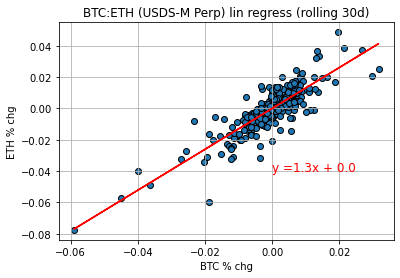

In [472]:
# Lin regress
x_value = BEXAS_df["pct_BTC"]
y_value = BEXAS_df["pct_ETH"]

x_label = "BTC"
y_label = "ETH"

linear_regression(x_value, y_value, x_label, y_label)

#### BTCUSDT vs. XRPUSDT Plot

The r-value is:0.7261695626170784
The beta is:0.7664054424213128


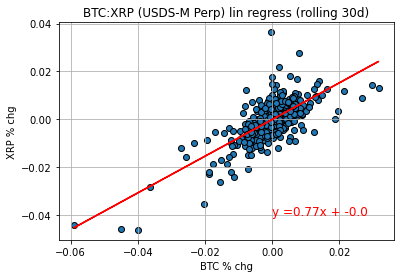

In [473]:
# Lin regress
x_value = BEXAS_df["pct_BTC"]
y_value = BEXAS_df["pct_XRP"]

x_label = "BTC"
y_label = "XRP"

linear_regression(x_value, y_value, x_label, y_label)

#### BTCUSDT vs. ADAUSDT Plot

The r-value is:0.7479998510558629
The beta is:1.0122912696707806


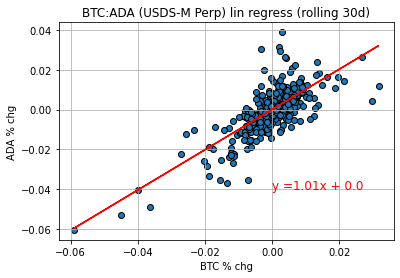

In [474]:
# Lin regress
x_value = BEXAS_df["pct_BTC"]
y_value = BEXAS_df["pct_ADA"]

x_label = "BTC"
y_label = "ADA"

linear_regression(x_value, y_value, x_label, y_label)

#### BTCUSDT vs. SOLUSDT Plot

The r-value is:0.8065193862331326
The beta is:1.3020302083657427


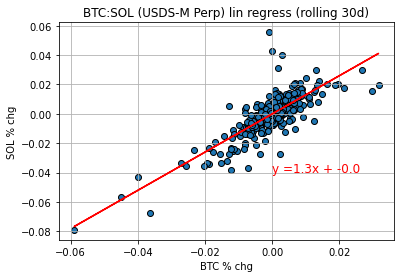

In [475]:
# Lin regress
x_value = BEXAS_df["pct_BTC"]
y_value = BEXAS_df["pct_SOL"]

x_label = "BTC"
y_label = "SOL"

linear_regression(x_value, y_value, x_label, y_label)

#### ETHUSDT vs. XRPUSDT Plot

The r-value is:0.7134858234307224
The beta is:0.49365815429203874


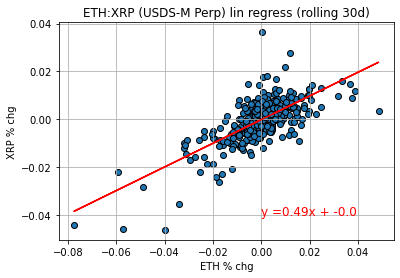

In [476]:
# Lin regress
x_value = BEXAS_df["pct_ETH"]
y_value = BEXAS_df["pct_XRP"]

x_label = "ETH"
y_label = "XRP"

linear_regression(x_value, y_value, x_label, y_label)

#### ETHUSDT vs. ADAUSDT Plot

The r-value is:0.7730851832378439
The beta is:0.6858857151167331


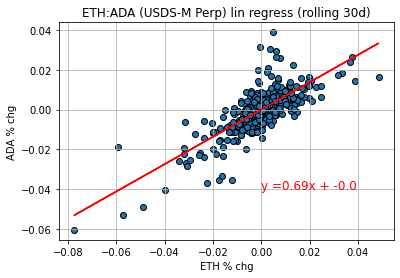

In [477]:
# Lin regress
x_value = BEXAS_df["pct_ETH"]
y_value = BEXAS_df["pct_ADA"]

x_label = "ETH"
y_label = "ADA"

linear_regression(x_value, y_value, x_label, y_label)

#### ETHUSDT vs. SOLUSDT Plot

The r-value is:0.8168314555369461
The beta is:0.8644883228592861


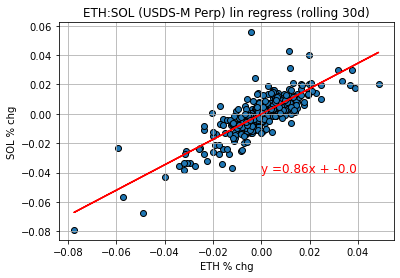

In [478]:
# Lin regress
x_value = BEXAS_df["pct_ETH"]
y_value = BEXAS_df["pct_SOL"]

x_label = "ETH"
y_label = "SOL"

linear_regression(x_value, y_value, x_label, y_label)

#### XRPUSDT vs. ADAUSDT Plot

The r-value is:0.7298832068626427
The beta is:0.9359158730098567


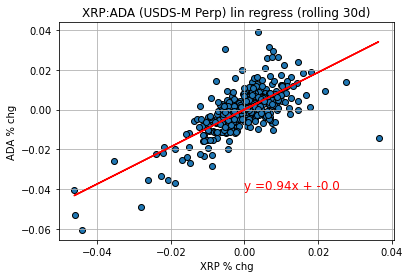

In [479]:
# Lin regress
x_value = BEXAS_df["pct_XRP"]
y_value = BEXAS_df["pct_ADA"]

x_label = "XRP"
y_label = "ADA"

linear_regression(x_value, y_value, x_label, y_label)

#### XRPUSDT vs. SOLUSDT Plot

The r-value is:0.7099434895993705
The beta is:1.0859491551836478


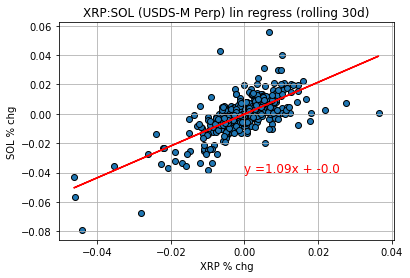

In [480]:
# Lin regress
x_value = BEXAS_df["pct_XRP"]
y_value = BEXAS_df["pct_SOL"]

x_label = "XRP"
y_label = "SOL"

linear_regression(x_value, y_value, x_label, y_label)

#### ADAUSDT vs. SOLUSDT Plot

The r-value is:0.7973546819839558
The beta is:0.9511605255544752


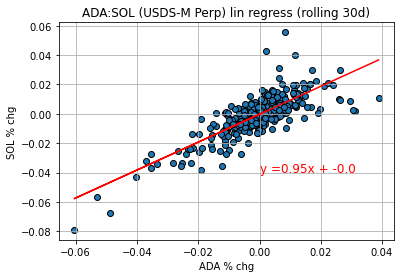

In [481]:
# Lin regress
x_value = BEXAS_df["pct_ADA"]
y_value = BEXAS_df["pct_SOL"]

x_label = "ADA"
y_label = "SOL"

linear_regression(x_value, y_value, x_label, y_label)

In [484]:
## Display correlations (descending order)

# Convert dict to df
correlations_df = pd.DataFrame(pairs_correlation).sort_values("r-value", ascending=False)
correlations_df["Earliest_interval"] = earliest
correlations_df["Latest_interval"] = latest
correlations_df["API_executed_UTC"] = executed_utc
print(f"Correlations of Binance USDS-M Perps (30d rolling)")
correlations_df

Correlations of Binance USDS-M Perps (30d rolling)
As at 2022-09-16 02:00:00


,Pair,r-value,beta,Earliest_interval,Latest_interval,API_executed_UTC
0,BTC:ETH,0.854997,1.304200,2022-08-17 04:00:00,2022-09-16 02:00:00,2022-09-16 03:03:38.736816+00:00
6,ETH:SOL,0.816831,0.864488,2022-08-17 04:00:00,2022-09-16 02:00:00,2022-09-16 03:03:38.736816+00:00
3,BTC:SOL,0.806519,1.302030,2022-08-17 04:00:00,2022-09-16 02:00:00,2022-09-16 03:03:38.736816+00:00
9,ADA:SOL,0.797355,0.951161,2022-08-17 04:00:00,2022-09-16 02:00:00,2022-09-16 03:03:38.736816+00:00
5,ETH:ADA,0.773085,0.685886,2022-08-17 04:00:00,2022-09-16 02:00:00,2022-09-16 03:03:38.736816+00:00
2,BTC:ADA,0.748000,1.012291,2022-08-17 04:00:00,2022-09-16 02:00:00,2022-09-16 03:03:38.736816+00:00
7,XRP:ADA,0.729883,0.935916,2022-08-17 04:00:00,2022-09-16 02:00:00,2022-09-16 03:03:38.736816+00:00
1,BTC:XRP,0.726170,0.766405,2022-08-17 04:00:00,2022-09-16 02:00:00,2022-09-16 03:03:38.736816+00:00
4,ETH:XRP,0.713486,0.493658,2022-08-17 04:00:00,2022-09-16 02:00:00,2022-09-16 03:03:38.736816+00:00
8,XRP:SOL,0.709943,1.085949,2022-08-17 04:00:00,2022-09-16 02:00:00,2022-09-16 03:03:38.736816+00:00


In [485]:
# import dataframe_image as dfi

# dfi.export(correlations_df, '')

# ! pip install dataframe_image
import dataframe_image as dfi

correlations_styled_df = correlations_df.style.background_gradient()
dfi.export(correlations_styled_df, "Images/Correlations_descending.png")